In [2]:
import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
import PreProcess_Utils as pputil

In [3]:
from dask.distributed import LocalCluster

cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing, removing memory_limit is important
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56831,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:56881,Total threads: 10
Dashboard: http://127.0.0.1:56884/status,Memory: 0 B
Nanny: tcp://127.0.0.1:56835,


In [7]:
year = 2019
path = 'C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/Alaska/2 IMS snowDynamics/ims_nc/IMS_' + str(year) + '.nc'
path

'C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/Alaska/2 IMS snowDynamics/ims_nc/IMS_2019.nc'

In [8]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims = pputil.loadXR(ims)
ims

CPU times: total: 297 ms
Wall time: 897 ms


<xarray.DataArray (time: 365, y: 73, x: 47)> Size: 1MB
array([[[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
...
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]]], dtype=uint8)
Coordinates:
  * x            (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y            (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
  * time         (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2019-12-31
    variable     <U18 72B 'IMS_Surface_Values'
    spatial_ref  int64 8B 0
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    05 August 2021 17:07Z: NetCDF file generated ...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

---------------------------------------------------------------------------------------------------------------------------
Water = Dark Blue | Land = Dark Green | Ice = Light Blue | Snow = Gray
Outside ROI = White
---------------------------------------------------------------------------------------------------------------------------
CPU times: total: 2min 44s
Wall time: 6min 27s


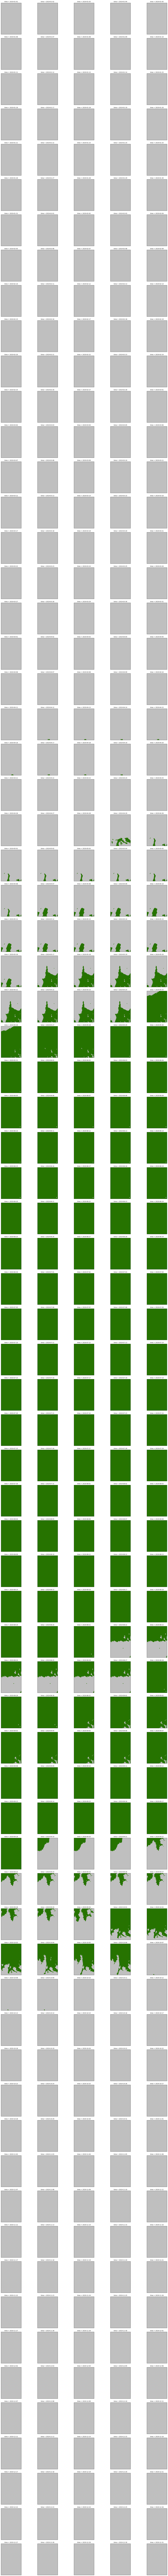

In [9]:
%%time
vutil.matrixPlot(ims, sat = '', type = 'ims')